In [1]:
import numpy as np
#import pyJHTDB
import matplotlib.pyplot as plt
import time as time_pkg
from point_bubble_JHTDB import analysis, model, interface
import pickle

(513, 512, 3)
(513, 512, 3)


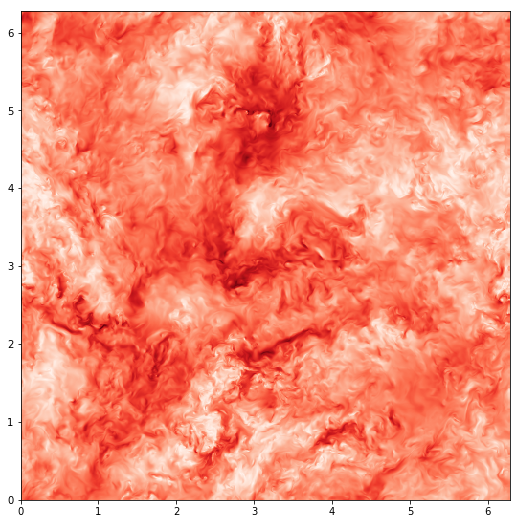

In [2]:
XYZ = np.load('XYZ.npy')
vel = np.load('vel.npy')
print(np.shape(vel))
print(np.shape(XYZ))
X = XYZ[:,:,0]
Y = XYZ[:,:,1]

fig,ax = plt.subplots(figsize=(9,9))
speed = np.linalg.norm(vel,axis=-1)
ax.pcolormesh(X,Y,speed,vmin=0,vmax=3,cmap='Reds')
ax.set_aspect('equal')

(513, 512, 3)


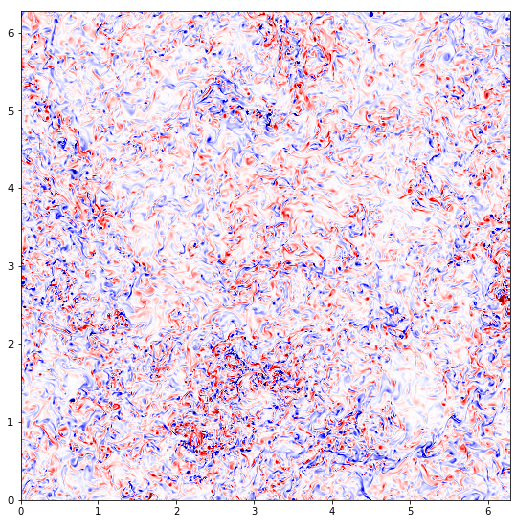

In [3]:
velgrad = np.load('velgrad.npy')
vort = analysis.get_vorticity(velgrad)
print(np.shape(vort))

fig,ax = plt.subplots(figsize=(9,9))
ax.pcolormesh(X,Y,vort[...,2],vmin=-100,vmax=100,cmap='seismic')
ax.set_aspect('equal')

[None, None, None]

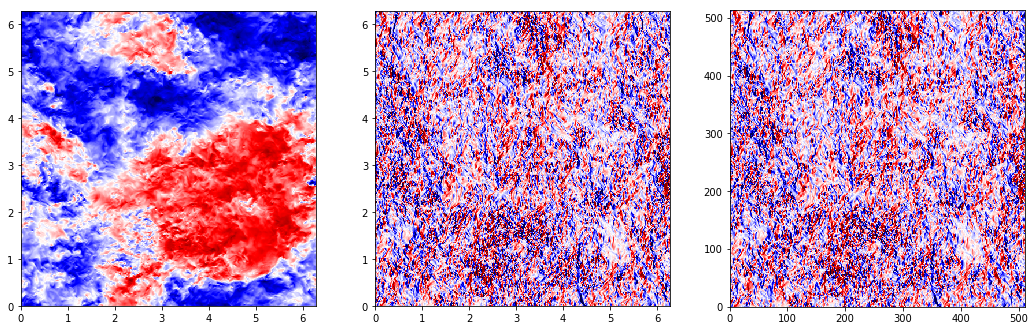

In [4]:
fig,axs = plt.subplots(1,3,figsize=(18,9))

dx = X[0,1]-X[0,0]

axs[0].pcolormesh(X,Y,vel[:,:,0],vmin=-2,vmax=2,cmap='seismic')
axs[1].pcolormesh(X,Y,velgrad[:,:,1,0],vmin=-20,vmax=20,cmap='seismic')
axs[2].pcolormesh((vel[:,1:,1]-vel[:,:-1,1])/dx,vmin=-20,vmax=20,cmap='seismic')

[ax.set_aspect('equal') for ax in axs]

In [5]:
#res = analysis.load_case(r'res_beta0.50_A0.04000_Cm0.50_Cl0.00_Cd1.00_pressureTerm1.000_liftTerm1.000.pkl')
res = pickle.load(open(r'for_video_2','rb'))

In [ ]:
d = model.L_int

bi = 0
#points_rot = res['x'][:,bi,:]
points = res['x'][:,bi,:]

n_per_side = 201

skip = 5
i_vec = np.arange(0,len(points),skip)
len(points)

fig,ax = plt.subplots()

coords = []
vels = []
for i in i_vec:
    
    
    
    t = res['t'][i]
    loc = points[i]
    z = np.linspace(loc[2]-d/2,loc[2]+d/2,n_per_side)
    x = np.linspace(loc[0]-d/2,loc[0]+d/2,n_per_side+1)
    X,Z = np.meshgrid(x,z)
    Y = np.ones_like(X)*loc[1]    
    XYZ = np.moveaxis(np.array([X,Y,Z]),0,-1)
    
    print('------------------')
    print(str(i)+', '+str(t)+', '+str(loc)+', ')
        
    XYZ_flat = np.reshape(XYZ,(len(x)*len(z),3))
    #print(np.shape(XYZ_flat))
    n = len(XYZ_flat)
    n_max = 4000
    n_call = int(n/n_max)+1
    #print('n_call = '+str(n_call))
    
    t1 = time_pkg.time()
    vel = []
    #velgrad = []
    for ni in range(n_call):
        vel.append(interface.get_velocity(t,XYZ_flat[ni*n_max:(ni+1)*n_max]))
        #velgrad.append(interface.get_velocity_gradient(t,XYZ_flat[ni*n_max:(ni+1)*n_max]))
    vel = np.concatenate(vel,axis=0)
    vel = np.reshape(vel,(len(z),len(x),3))
    vels.append(vel)
    coords.append(XYZ)
    
    if i%100==0:
        np.save('for_video_2_vels.npy',np.array(vels))
        np.save('for_video_2_xyz.npy',coords)
        np.save('for_video_2_i.npy',i_vec)
    #print(np.shape(vel))
    #print(np.shape(vel))
    #stophere
    
#     ax.clear()
#     speed = np.linalg.norm(vel,axis=-1)
#     ax.pcolormesh(X,Z,speed,vmin=0,vmax=2,cmap='Reds')
#     ax.set_aspect('equal')
#     plt.show()
    #stophere
    

------------------
0, 0.0, [5.69300884 4.35683621 5.4156427 ], 
------------------
5, 0.005, [5.69322255 4.35661863 5.42251514], 
------------------
10, 0.01, [5.69375412 4.35605436 5.42940557], 
------------------
15, 0.015, [5.69455783 4.3551767  5.43631293], 
------------------
20, 0.02, [5.69561171 4.35400601 5.44326142], 
------------------
25, 0.025, [5.6969109  4.35255697 5.45027186], 
------------------
30, 0.03, [5.69847664 4.35086385 5.45735202], 
------------------
35, 0.035, [5.70030824 4.34897222 5.46449098], 
------------------
40, 0.04, [5.70243385 4.3469493  5.47168278], 
------------------
45, 0.045, [5.70490734 4.34486549 5.47893171], 
------------------
50, 0.05, [5.70777656 4.3427154  5.48628054], 
------------------
55, 0.055, [5.71109124 4.34053431 5.49370157], 
------------------
60, 0.06, [5.71489355 4.33830849 5.5011308 ], 
------------------
65, 0.065, [5.71916709 4.33595332 5.50852343], 
------------------
70, 0.07, [5.72386704 4.33343834 5.51586001], 
------

In [ ]:
plt.figure()
vels = np.array(vels)
plt.plot(vels[:,30,30,:])

In [ ]:
np.save('for_video_2_vels.npy',np.array(vels))
np.save('for_video_2_xyz.npy',coords)
np.save('for_video_2_i.npy',i_vec)